<a href="https://colab.research.google.com/github/gwenLemur/CalcProject/blob/main/MainRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
feature = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_label.csv')
Xtrain = feature.values
Ytrain = label.values
Ytrain.reshape((-1,1))

print(Xtrain.shape, Ytrain.shape)

tfeature = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_test_feature.csv')
tlabel = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_test_label.csv')
Xtest = tfeature.values
Ytest = tlabel.values
Ytest.reshape((-1,1))

print(Xtest.shape, Ytest.shape)

(124, 5) (124, 1)
(30, 5) (30, 1)


In [4]:
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=75, random_state=10, shuffle=True, stratify=None)

In [5]:
# Hint:
# Do you need to split the dataset?
# How to prediction? Features?
# Polynomial? Order? Would it be overfitting?
# Loss function?
# Plot?

# Go over the past slides and labs!

361.1983944466204
350.6128489733614
369.6710923795807


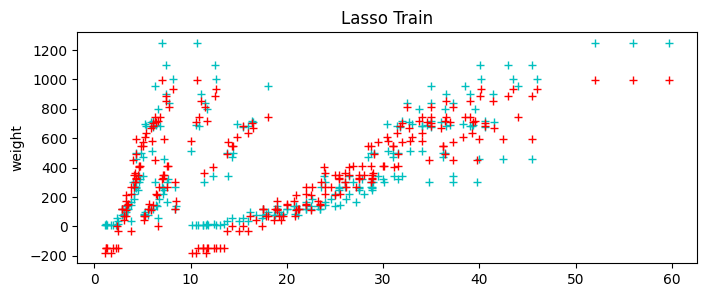

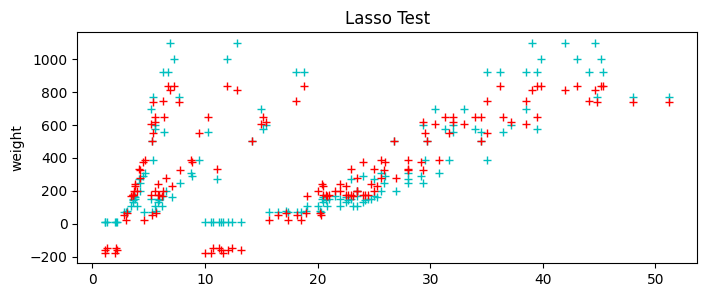

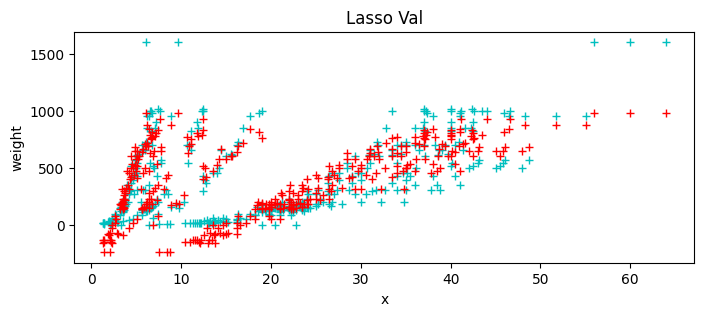

In [6]:
sk = Lasso(alpha = 0.1, max_iter = 10000)

sk.fit(Xtrain, Ytrain)
yTrainPred = sk.predict(Xtrain)
yTestPred = sk.predict(Xtest)
yValPred = sk.predict(Xval)


print(np.mean(np.sqrt((Ytrain-yTrainPred)**2)))
print(np.mean(np.sqrt((Ytest-yTestPred)**2)))
print(np.mean(np.sqrt((Yval-yValPred)**2)))

fig = plt.figure(figsize=(8, 3))
plt.title('Lasso Train')
plt.ylabel('weight')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')

fig2 = plt.figure(figsize=(8, 3))
plt.title('Lasso Test')
plt.ylabel('weight')
plt.plot(Xtest, Ytest, 'c+')
plt.plot(Xtest, yTestPred, 'r+')

fig3 = plt.figure(figsize=(8,3))
plt.title('Lasso Val')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, yValPred, 'r+')

360.5752072363925
351.59998450164153
369.4495324476497


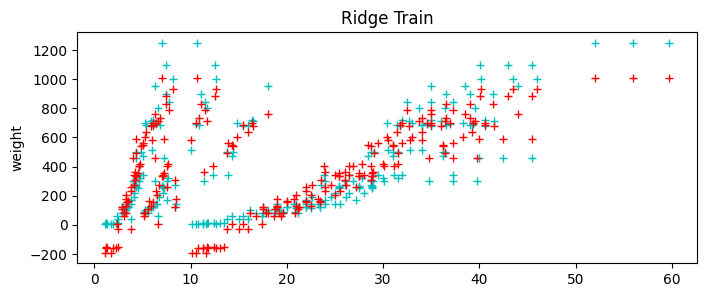

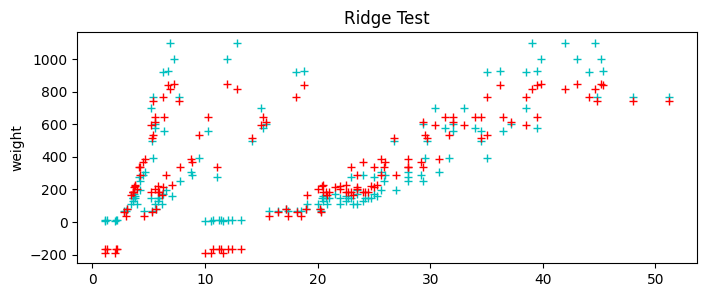

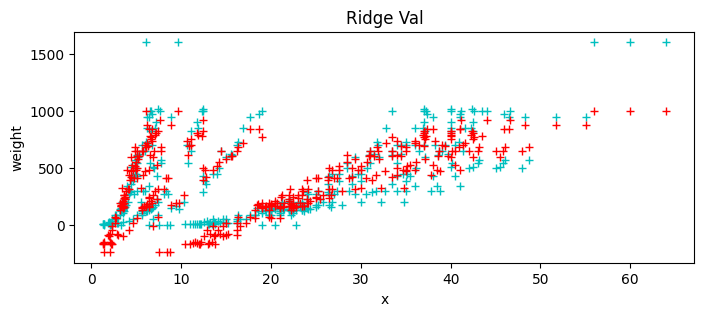

In [7]:

sk = Ridge()

sk.fit(Xtrain, Ytrain)
yTrainPred = sk.predict(Xtrain)
yTestPred = sk.predict(Xtest)
yValPred = sk.predict(Xval)

print(np.mean(np.sqrt((Ytrain-yTrainPred)**2)))
print(np.mean(np.sqrt((Ytest-yTestPred)**2)))
print(np.mean(np.sqrt((Yval-yValPred)**2)))

fig = plt.figure(figsize=(8, 3))
plt.title('Ridge Train')
plt.ylabel('weight')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')

fig2 = plt.figure(figsize=(8, 3))
plt.title('Ridge Test')
plt.ylabel('weight')
plt.plot(Xtest, Ytest, 'c+')
plt.plot(Xtest, yTestPred, 'r+')

fig3 = plt.figure(figsize=(8,3))
plt.title('Ridge Val')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, yValPred, 'r+')




80.75067652362848
66.13946139515144
83.95291758914571


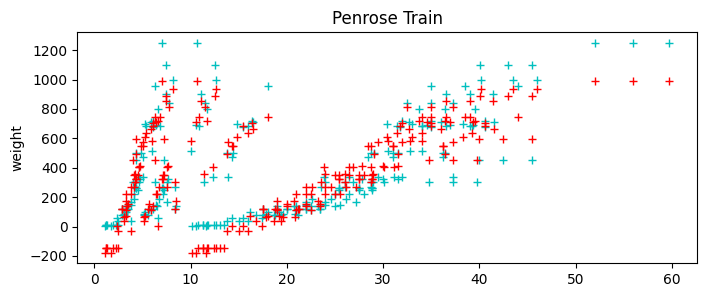

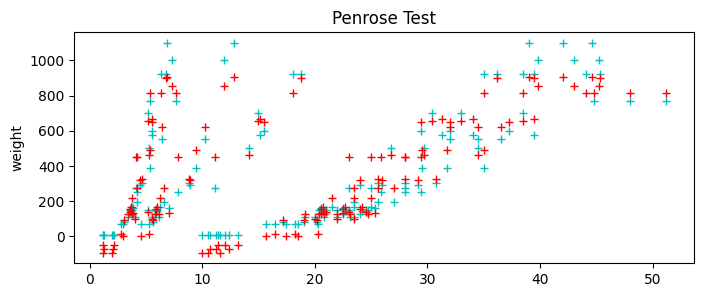

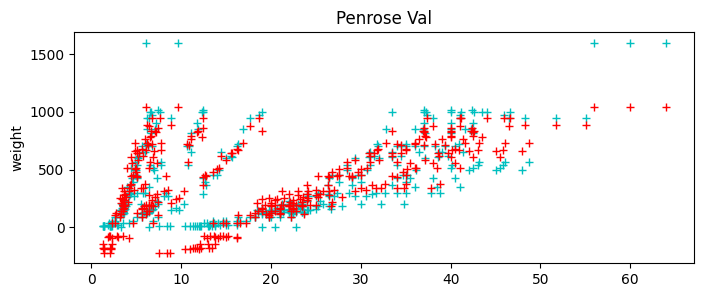

In [8]:
#train
Xprime = np.hstack([np.ones((len(Xtrain),1)), Xtrain])
y = Ytrain.reshape(-1, 1)
w = np.linalg.inv(Xprime.T@Xprime)@Xprime.T@Ytrain
yHat = Xprime@w
print(np.mean(np.sqrt((Ytrain-yHat)**2)))

fig1 = plt.figure(figsize=(8, 3))
plt.title('Penrose Train')
plt.ylabel('weight')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yHat, 'r+')

#test
Xprime = np.hstack([np.ones((len(Xtest),1)), Xtest])
y = Ytest.reshape(-1, 1)
w = np.linalg.inv(Xprime.T@Xprime)@Xprime.T@Ytest
yHat = Xprime@w
print(np.mean(np.sqrt((Ytest-yHat)**2)))

fig2 = plt.figure(figsize=(8, 3))
plt.title('Penrose Test')
plt.ylabel('weight')
plt.plot(Xtest, Ytest, 'c+')
plt.plot(Xtest, yHat, 'r+')

#val
Xprime = np.hstack([np.ones((len(Xval),1)), Xval])
y = Yval.reshape(-1, 1)
w = np.linalg.inv(Xprime.T@Xprime)@Xprime.T@Yval
yHat = Xprime@w
print(np.mean(np.sqrt((Yval-yHat)**2)))

fig3 = plt.figure(figsize=(8, 3))
plt.title('Penrose Val')
plt.ylabel('weight')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, yHat, 'r+')

(49, 1)
MSE Train:  80.75067652356134
MSE Test:  86.92491545181059
MSE Val:  95.83233896042657


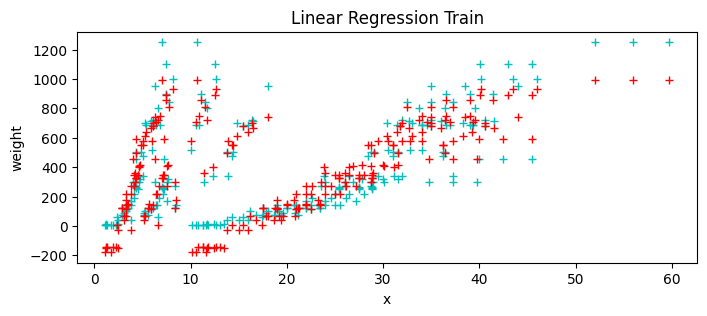

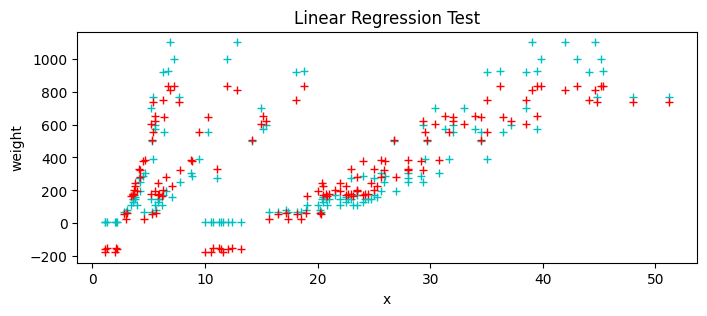

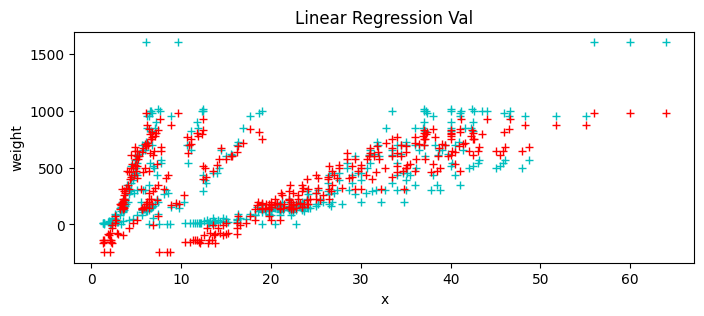

In [9]:
# linear regression model and MSE:
feat=label.columns.to_list()


X = label[feat].values
regr = LinearRegression(fit_intercept=True)
regr.fit(Xtrain,Ytrain)


yTrainPred = regr.predict(Xtrain) # Model prediction
print(yTrainPred.shape)


yTestPred = regr.predict(Xtest)
yValPred = regr.predict(Xval)


#MSE
mse_yTrain = np.mean(np.sqrt((Ytrain-yTrainPred)**2))
mse_yTest = np.mean(np.sqrt((Ytest-yTestPred)**2))
mse_yVal = np.mean(np.sqrt((Yval-yValPred)**2))
print("MSE Train: ", mse_yTrain)
print("MSE Test: ",mse_yTest)
print("MSE Val: ",mse_yVal)


fig1 = plt.figure(figsize=(8,3))
plt.title('Linear Regression Train')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')


fig2 = plt.figure(figsize=(8,3))
plt.title('Linear Regression Test')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xtest, Ytest, 'c+')
plt.plot(Xtest, yTestPred, 'r+')


fig3 = plt.figure(figsize=(8,3))
plt.title('Linear Regression Val')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, yValPred, 'r+')